# Giới thiệu 📌  

Trong bài học trước, chúng ta đã tìm hiểu về phương pháp đầu tiên trong **kỹ thuật đặc trưng dựa trên mô hình**: **phân cụm** (*clustering*). Trong bài học này, chúng ta sẽ khám phá một phương pháp tiếp theo: **phân tích thành phần chính** (*Principal Component Analysis - PCA*).  

Tương tự như cách phân cụm **chia tập dữ liệu thành các nhóm dựa trên sự gần nhau**, PCA có thể được xem như **chia nhỏ phương sai trong dữ liệu**. PCA là một công cụ mạnh mẽ giúp bạn **khám phá các mối quan hệ quan trọng trong dữ liệu** và cũng có thể được sử dụng để tạo ra các **đặc trưng mang nhiều thông tin hơn**. 🔍📊  

> 📌 **Lưu ý kỹ thuật**: PCA thường được áp dụng trên dữ liệu đã được [**chuẩn hóa**](https://www.kaggle.com/alexisbcook/scaling-and-normalization).  
> - Với dữ liệu chuẩn hóa, **"phương sai" đồng nghĩa với "tương quan"** (*correlation*).  
> - Với dữ liệu chưa chuẩn hóa, **"phương sai" đồng nghĩa với "hiệp phương sai"** (*covariance*).  
> - Trong khóa học này, **tất cả dữ liệu sẽ được chuẩn hóa trước khi áp dụng PCA**. ⚖️✅  

---

# Phân tích thành phần chính (PCA) 🎯  

Trong tập dữ liệu [*Abalone*](https://www.kaggle.com/rodolfomendes/abalone-dataset), có các phép đo vật lý được thu thập từ hàng nghìn con **abalone** tại Tasmania. *(Abalone là một loài sinh vật biển tương tự như ngao hoặc hàu 🐚.)*  

Hiện tại, chúng ta chỉ xem xét hai đặc trưng: **`Height`** (chiều cao) và **`Diameter`** (đường kính) của vỏ abalone.  

Bạn có thể tưởng tượng rằng trong dữ liệu này tồn tại những **"trục biến thiên"** (*axes of variation*) mô tả cách các cá thể abalone khác nhau. Về mặt trực quan, các trục này xuất hiện dưới dạng **các đường vuông góc chạy dọc theo các chiều tự nhiên của dữ liệu**, với **mỗi trục tương ứng với một đặc trưng ban đầu**. 🏹📈  

<figure style="padding: 1em;">
<img src="../_static/images/rr8NCDy.png" width=300, alt="">
<figcaption style="textalign: center; font-style: italic"><center>
</center></figcaption>
</figure>  

### 🌀 Axes of Variation in PCA

Thường thì chúng ta có thể đặt tên cho các **trục biến thiên** (*axes of variation*).  

- Trục dài hơn có thể gọi là **"Kích thước"** (*Size*):  
  - 📉 *Chiều cao nhỏ* và *đường kính nhỏ* (góc dưới bên trái)  
  - 📈 *Chiều cao lớn* và *đường kính lớn* (góc trên bên phải)  

- Trục ngắn hơn có thể gọi là **"Hình dạng"** (*Shape*):  
  - 🔵 *Chiều cao nhỏ* và *đường kính lớn* (*dáng dẹt*)  
  - 🟠 *Chiều cao lớn* và *đường kính nhỏ* (*dáng tròn*)  

---

💡 **Chú ý:**  
Thay vì mô tả *abalone* bằng `Height` (📏 Chiều cao) và `Diameter` (⚫ Đường kính),  
chúng ta có thể mô tả chúng bằng **"Size"** và **"Shape"**.  

🔄 **Đây chính là bản chất của PCA (Principal Component Analysis)**:  
Thay vì mô tả dữ liệu bằng các đặc trưng ban đầu, chúng ta mô tả nó bằng **các trục biến thiên chính** (*principal components*).  
Các **trục biến thiên chính** trở thành **đặc trưng mới** của tập dữ liệu.

<figure style="padding: 1em;">
<img src="../_static/images/XQlRD1q.png" width=600, alt="PCA transformation">
<figcaption style="textalign: center; font-style: italic">
<center>🧩 Các *principal components* trở thành đặc trưng mới bằng cách xoay dữ liệu trong không gian đặc trưng.</center>
</figcaption>
</figure>

---

### 🔢 Công thức PCA - **Tổ hợp tuyến tính của các đặc trưng ban đầu**
📊 Các đặc trưng mới trong PCA thực chất chỉ là các **tổ hợp tuyến tính** (*linear combinations*) của các đặc trưng gốc:

```python
df["Size"] = 0.707 * X["Height"] + 0.707 * X["Diameter"]
df["Shape"] = 0.707 * X["Height"] - 0.707 * X["Diameter"]
```
### 🎯 **Principal Components and Loadings**

📌 Các đặc trưng mới được tạo ra trong PCA được gọi là **thành phần chính** (*principal components*).  
📌 Các trọng số tương ứng của chúng được gọi là **loadings**.  

🔢 **Số lượng thành phần chính** sẽ bằng với số lượng đặc trưng trong tập dữ liệu gốc:  
- Nếu chúng ta sử dụng 10 đặc trưng ban đầu, chúng ta sẽ thu được 10 **principal components**.

---

### 🔍 **Ý nghĩa của Loadings**
✅ Các **loadings** cho biết thành phần chính biểu diễn loại biến thiên nào dựa trên **dấu và độ lớn** của hệ số.

| 📊 **Features \ Components** | 📏 **Size (PC1)** | 🌀 **Shape (PC2)** |
|-----------------------------|------------------|------------------|
| Height 📏                    | 0.707            | 0.707            |
| Diameter ⚫                   | 0.707            | -0.707           |

📌 **Size (PC1) 🏗:**  
- Cả *Height* 📏 và *Diameter* ⚫ đóng góp với trọng số **dương** ➝ Đại diện cho **kích thước tổng thể**.

📌 **Shape (PC2) 🔄:**  
- *Height* 📏 và *Diameter* ⚫ có trọng số **trái dấu** ➝ Đại diện cho **độ dẹt hay độ tròn**.

### 📊 **Phân tích Loadings trong PCA**

📌 Bảng *loadings* này cho chúng ta biết rằng trong **thành phần `Size`**:  
- `Height` 📏 và `Diameter` ⚫ biến thiên cùng chiều (**cùng dấu**).  

📌 Nhưng trong **thành phần `Shape`**:  
- `Height` 📏 và `Diameter` ⚫ biến thiên theo chiều ngược nhau (**khác dấu**).  

📝 Trong mỗi thành phần, các *loadings* có độ lớn như nhau, do đó các đặc trưng đóng góp tương đương vào cả hai thành phần.

---

### 📈 **Tỷ lệ phương sai giải thích trong PCA**  
PCA không chỉ cho biết các thành phần chính mà còn cho biết **mức độ biến thiên** mà mỗi thành phần nắm bắt.  

Từ hình dưới, chúng ta thấy rằng dữ liệu biến thiên nhiều hơn dọc theo thành phần `Size` so với thành phần `Shape`.  
PCA làm điều này một cách chính xác bằng cách tính **tỷ lệ phương sai giải thích** (*percent of explained variance*).

<figure style="padding: 1em;">
<img src="../_static/images/xWTvqDA.png" width=600, alt="">
<figcaption style="textalign: center; font-style: italic"><center>
📊 *Size* chiếm khoảng **96%** và *Shape* chỉ chiếm khoảng **4%** tổng phương sai của `Height` và `Diameter`.
</center></figcaption>
</figure>

📌 Thành phần `Size` **nắm bắt phần lớn biến thiên** giữa `Height` 📏 và `Diameter` ⚫.  
📌 Tuy nhiên, **lượng phương sai trong một thành phần không đồng nghĩa với việc nó là đặc trưng dự đoán tốt nhất** – điều đó còn tùy thuộc vào **mục tiêu dự đoán của bạn**.  

---

## 🏗 **Ứng dụng PCA trong Kỹ thuật Đặc trưng**  

Có hai cách bạn có thể sử dụng PCA để tạo đặc trưng mới (*feature engineering*).

### 1️⃣ 📊 **Sử dụng PCA như một kỹ thuật mô tả**
📝 Vì PCA giúp xác định các **trục biến thiên chính**, ta có thể:  
✅ Tính **MI scores** (hệ số tương quan thông tin) cho các thành phần PCA để xem biến thiên nào có giá trị dự đoán cao nhất.  
✅ Dùng thông tin này để tạo đặc trưng mới:  
   - Nếu **`Size`** quan trọng → tạo đặc trưng bằng tích `Height * Diameter`.  
   - Nếu **`Shape`** quan trọng → tạo đặc trưng bằng tỷ lệ `Height / Diameter`.  
✅ Thậm chí có thể **gom cụm (clustering)** trên các thành phần PCA có hệ số cao.

### 2️⃣ 🏗 **Sử dụng các thành phần PCA như đặc trưng mới**  
PCA giúp **biến đổi cấu trúc biến thiên dữ liệu** trực tiếp, đôi khi giúp ích hơn so với đặc trưng ban đầu. Một số ứng dụng bao gồm:

- 🔽 **Giảm số chiều (Dimensionality Reduction)**:  
  - Nếu dữ liệu có nhiều đặc trưng tương quan (*multicollinearity*), PCA sẽ **tách ra các thành phần có phương sai thấp** và ta có thể loại bỏ chúng để tránh dư thừa.  

- 🚨 **Phát hiện bất thường (Anomaly Detection)**:  
  - Những điểm dữ liệu khác biệt có thể dễ dàng nhận thấy trong **các thành phần có phương sai thấp**.

- 🔊 **Giảm nhiễu (Noise Reduction)**:  
  - PCA có thể giúp tách **tín hiệu quan trọng** ra khỏi nhiễu, tăng **tỷ lệ tín hiệu trên nhiễu** (*signal-to-noise ratio*).

- 🔄 **Giảm tương quan đặc trưng (Decorrelation)**:  
  - Một số thuật toán **khó xử lý dữ liệu có đặc trưng tương quan cao**, PCA giúp biến đổi chúng thành **các đặc trưng không tương quan**.

📌 **PCA giúp bạn truy cập trực tiếp vào cấu trúc tương quan của dữ liệu!**  
🚀 Bạn hoàn toàn có thể sáng tạo ra các ứng dụng riêng từ PCA!

---

### 🎯 **📌 PCA - Best Practices**  

<blockquote style="margin-right:auto; margin-left:auto; background-color: #ebf9ff; padding: 1em; margin:24px;">
🔍 **Những điều cần lưu ý khi sử dụng PCA:**  
✅ PCA **chỉ hoạt động với các đặc trưng số** (dữ liệu dạng liên tục hoặc số đếm).  
✅ PCA **nhạy cảm với tỉ lệ (scale)** → Nên chuẩn hóa dữ liệu (*standardization*) trước khi áp dụng PCA.  
✅ Hãy **loại bỏ hoặc giới hạn các ngoại lai** (*outliers*), vì chúng có thể ảnh hưởng lớn đến kết quả PCA.  
</blockquote>

---

## 🚗 **Ví dụ - PCA trên dữ liệu Ô tô 1985**  

Trong ví dụ này, chúng ta sẽ quay lại tập dữ liệu [*Automobile*](https://www.kaggle.com/toramky/automobile-dataset) và áp dụng PCA để **khám phá các đặc trưng tiềm năng**.  

🏗 Ở phần bài tập, bạn sẽ có cơ hội thử nghiệm thêm nhiều ứng dụng khác của PCA! 🚀 

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from sklearn.feature_selection import mutual_info_regression

plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


df = pd.read_csv("autos.csv")

📌 Chúng ta đã chọn **bốn đặc trưng** đại diện cho nhiều loại tính chất khác nhau.  

✅ Mỗi đặc trưng này đều có **điểm MI cao** (*Mutual Information score*) với biến mục tiêu **`price`** 💰.  
✅ Vì các đặc trưng này không cùng đơn vị đo lường, chúng ta sẽ **chuẩn hóa dữ liệu** (*standardization*) trước khi sử dụng. 📏🔄  

In [22]:
features = ["highway_mpg", "engine_size", "horsepower", "curb_weight"]

X = df.copy()
y = X.pop('price')
X = X.loc[:, features]

# Standardize
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

✅ Bây giờ, chúng ta có thể huấn luyện bộ ước lượng `PCA` của **scikit-learn** để tạo ra các **thành phần chính** (*principal components*).  

📊 Dưới đây là một số hàng đầu tiên của tập dữ liệu sau khi được biến đổi bằng PCA:  

In [23]:
from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4
0,0.382486,-0.400222,0.124122,0.169539
1,0.382486,-0.400222,0.124122,0.169539
2,1.550890,-0.107175,0.598361,-0.256081
3,-0.408859,-0.425947,0.243335,0.013920
4,1.132749,-0.814565,-0.202885,0.224138


✅ Sau khi huấn luyện, đối tượng `PCA` sẽ chứa các **loadings** trong thuộc tính `components_`.  

📌 (*Thuật ngữ trong PCA không thống nhất giữa các tài liệu. Ở đây, chúng ta gọi các cột đã biến đổi trong `X_pca` là **components**, dù chúng không có tên riêng.*)  

📊 Chúng ta sẽ đóng gói các **loadings** vào một **DataFrame** để dễ dàng quan sát.  

In [24]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4
highway_mpg,-0.492347,0.770892,0.070142,-0.397996
engine_size,0.503859,0.626709,0.019960,0.594107
horsepower,0.500448,0.013788,0.731093,-0.463534
curb_weight,0.503262,0.113008,-0.678369,-0.523232


📌 Nhớ rằng **dấu và độ lớn của các loadings** trong một thành phần cho chúng ta biết **loại biến thiên** mà nó nắm bắt được.  

✅ **Thành phần đầu tiên (`PC1`)** thể hiện sự đối lập giữa:  
- 🚗 **Xe lớn, mạnh mẽ, tiêu hao nhiên liệu cao** ⛽  
- 🚙 **Xe nhỏ, tiết kiệm nhiên liệu tốt** 🌱  

📊 Chúng ta có thể gọi đây là **trục "Luxury/Economy"** 💎↔️💰.  

📌 Hình tiếp theo cho thấy rằng **bốn đặc trưng** mà chúng ta đã chọn chủ yếu biến thiên dọc theo **trục Luxury/Economy**.  

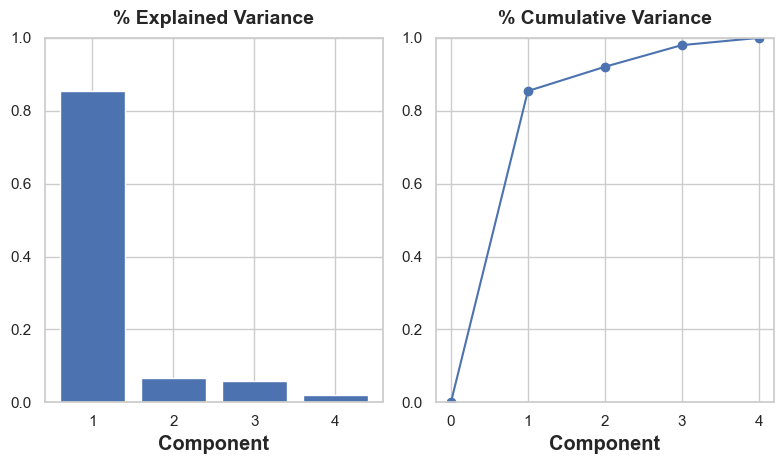

In [25]:
# Look at explained variance
plot_variance(pca);

📊 **Phân tích MI scores của các thành phần PCA**  

✅ Không có gì ngạc nhiên khi **`PC1` có độ tương quan thông tin cao** (*high MI score*),  
vì nó nắm bắt **biến thiên chính Luxury/Economy** 💎↔️💰.  

✅ Tuy nhiên, **các thành phần còn lại** dù có phương sai nhỏ, vẫn thể hiện mối quan hệ đáng kể với **`price`** 💰.  

📌 Việc phân tích sâu hơn các thành phần này có thể giúp khám phá những **mối quan hệ tiềm ẩn khác**,  
mà trục Luxury/Economy chưa thể hiện đầy đủ. 🔍📈  

In [26]:
mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
mi_scores

PC1    1.013824
PC2    0.378706
PC3    0.306244
PC4    0.204447
Name: MI Scores, dtype: float64

📌 **Thành phần thứ ba (`PC3`)** thể hiện sự đối lập giữa:  

- 🚗 **`horsepower` cao** ⚡ → Xe thể thao 🏎  
- 🚙 **`curb_weight` cao** ⚖ → Xe wagon 🚐  

✅ Có vẻ như `PC3` phân tách giữa **xe thể thao** 🏎 và **xe wagon** 🚐 một cách rõ ràng.  

In [27]:
# Show dataframe sorted by PC3
idx = X_pca["PC3"].sort_values(ascending=False).index
cols = ["make", "body_style", "horsepower", "curb_weight"]
df.loc[idx, cols]

,make,body_style,horsepower,curb_weight
118,porsche,hardtop,207,2756
117,porsche,hardtop,207,2756
119,porsche,convertible,207,2800
45,jaguar,sedan,262,3950
96,nissan,hatchback,200,3139
...,...,...,...,...
59,mercedes-benz,wagon,123,3750
61,mercedes-benz,sedan,123,3770
101,peugot,wagon,95,3430
105,peugot,wagon,95,3485


📌 Để thể hiện rõ sự đối lập này, chúng ta sẽ tạo một **đặc trưng tỷ lệ mới**:  

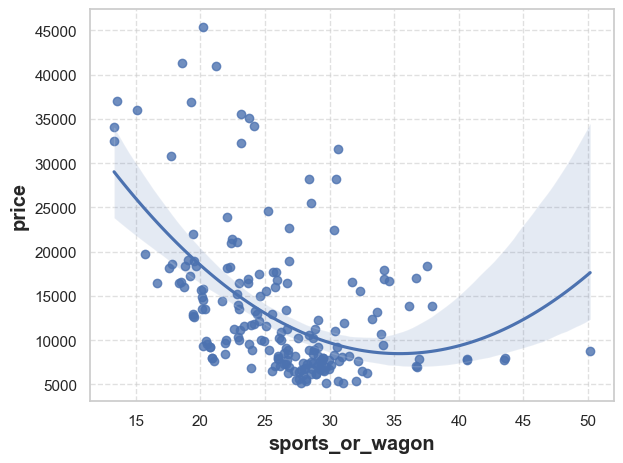

In [28]:
df["sports_or_wagon"] = X.curb_weight / X.horsepower
sns.regplot(x="sports_or_wagon", y='price', data=df, order=2);
plt.grid(True, linestyle='--', alpha=0.6)

# 🔄 **Đến lượt bạn!**  

📌 [**Cải thiện tập đặc trưng của bạn**](https://www.kaggle.com/kernels/fork/14393921)  
bằng cách **phân tách biến thiên** trong tập dữ liệu *Ames Housing* 🏡  
và sử dụng **thành phần chính** để phát hiện **điểm ngoại lai**! 🚀  

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/feature-engineering/discussion) to chat with other learners.*